<center><h2>
<a href="https://masumbhai.me">Kindly visit my portfolio to see more of my works</a>
</h2></center>

In [84]:
import pandas as pd
import numpy as np
from dask import dataframe as dd
from dask.distributed import Client
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sb

<center><h4 style="background:black;color:#7CFC00">
Setting up paths to csv files / datasets
</center></h4>

In [85]:
path_DdoS_DNS = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_DNS.csv"
path_DdoS_MSSQL = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_MSSQL.csv"
path_DdoS_LDAP = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_LDAP.csv"
path_DdoS_NTP = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_NTP.csv"
path_DdoS_NetBIOS = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_NetBIOS.csv"
path_DdoS_SNMP = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_SNMP.csv"
path_DdoS_SSDP = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_SSDP.csv"
path_DdoS_UDP = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_UDP.csv"
path_Syn = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_Syn.csv"
path_TFTP = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_TFTP.csv"
path_UDPLag = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\cleaned_DrDoS_udpLag.csv"

paths = [path_DdoS_DNS, path_DdoS_MSSQL, path_DdoS_LDAP, path_DdoS_NTP, path_DdoS_SNMP,path_DdoS_SSDP, path_DdoS_UDP, path_Syn, path_TFTP, path_UDPLag, path_DdoS_NetBIOS]

print("Total Dataset CSV Files", len(paths))


Total Dataset CSV Files 11


In [86]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

In [87]:
df = pd.DataFrame()

d0 = readCSV_Function(paths[0])
d0 = shuffle(d0)
d0 = d0.sample(n=30000)

d1 = readCSV_Function(paths[1])
d1 = shuffle(d1)
d1 = d1.sample(n=30000)

d2 = readCSV_Function(paths[2])
d2 = shuffle(d2)
d2 = d2.sample(n=30000)

d3 = readCSV_Function(paths[3])
d3 = shuffle(d3)
d3 = d3.sample(n=30000)


d4 = readCSV_Function(paths[4])
d4 = shuffle(d4)
d4 = d4.sample(n=30000)

d5 = readCSV_Function(paths[5])
d5 = shuffle(d5)
d5 = d5.sample(n=30000)

d6 = readCSV_Function(paths[6])
d6 = shuffle(d6)
d6 = d6.sample(n=30000)

d7 = readCSV_Function(paths[7])
d7 = shuffle(d7)
d7 = d7.sample(n=30000)

d8 = readCSV_Function(paths[8])
d8 = shuffle(d8)
d8 = d8.sample(n=30000)

d9 = readCSV_Function(paths[9])
d9 = shuffle(d9)
d9 = d9.sample(n=30000)

d10 = readCSV_Function(paths[10])
d10 = shuffle(d10)
d10 = d10.sample(n=19000)

df = pd.concat([d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10])
# for i in paths:
#     dask_df = readCSV_Function(i)
#     dask_df = shuffle(dask_df)
#     dask_df = dask_df.sample(n=30000)
#     df = pd.concat([df,dask_df])

df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df = shuffle(df) # for better model creation, data shuffling is must
df.reset_index(inplace=True,drop=True)
df.shape

(319000, 78)

<center><h3 style="background:#00FF00;color:black">
Saving New DataFrame as csv file to new location
</h3></center>

In [88]:
def dataCleaningResultToAnotherCSV(dataFrameArg, dirPath, file_name):
    dataFrameArg.to_csv(dirPath + file_name)

In [89]:
newDataFramePath = "C:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\Concatenated_Data_Before_Feature_Engineering\\"
newFileName = "Cleaned_Data.csv"
dataCleaningResultToAnotherCSV(dataFrameArg=df, dirPath=newDataFramePath, file_name=newFileName)

<center><h2 style="background:#00FFFF;color:black">
Visualization
</h2></center>

In [90]:
df["Label"].value_counts()

DrDoS_SSDP       29975
TFTP             29948
DrDoS_UDP        29940
Syn              29936
DrDoS_MSSQL      29750
DrDoS_NTP        29667
DrDoS_SNMP       29531
DrDoS_DNS        29194
UDP-lag          28734
DrDoS_LDAP       28619
DrDoS_NetBIOS    17420
BENIGN            6147
WebDDoS            139
Name: Label, dtype: int64

Here, we noticed that, the amount of Benign is very much little

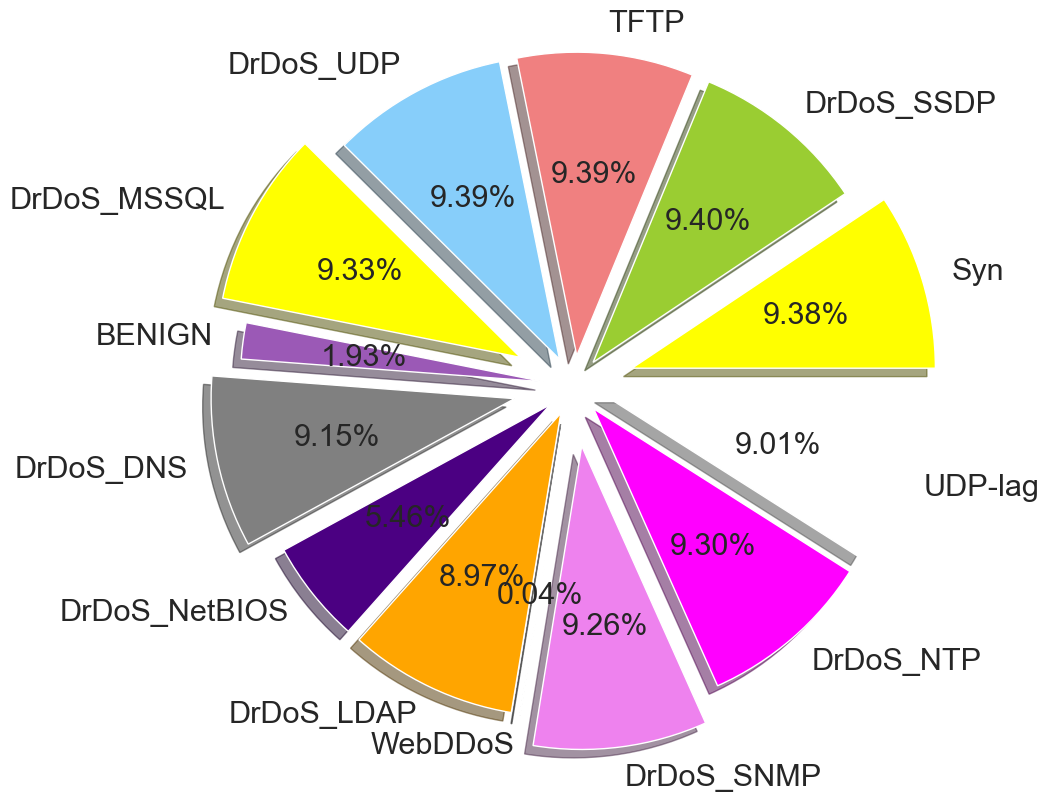

In [108]:
labels = ["Syn","DrDoS_SSDP","TFTP","DrDoS_UDP","DrDoS_MSSQL","BENIGN","DrDoS_DNS","DrDoS_NetBIOS","DrDoS_LDAP","WebDDoS","DrDoS_SNMP","DrDoS_NTP","UDP-lag"]
sizes = [len(df[df["Label"]=="Syn"]),
         len(df[df["Label"]=="DrDoS_SSDP"]),
         len(df[df["Label"]=="TFTP"]),
         len(df[df["Label"]=="DrDoS_UDP"]),
         len(df[df["Label"]=="DrDoS_MSSQL"]),
         len(df[df["Label"]=="BENIGN"]),
         len(df[df["Label"]=="DrDoS_DNS"]),
         len(df[df["Label"]=="DrDoS_NetBIOS"]),
         len(df[df["Label"]=="DrDoS_LDAP"]),
         len(df[df["Label"]=="WebDDoS"]),
         len(df[df["Label"]=="DrDoS_SNMP"]),
         len(df[df["Label"]=="DrDoS_NTP"]),
         len(df[df["Label"]=="UDP-lag"])]
colors = ["#F4D03F",
          "#03A9F4",
          "#03A9F4",
          "lightskyblue",
          "yellow",
          "#9B59B6",
          "grey",
          "indigo",
          "orange",
          "black",
          "violet",
          "magenta",
          "white"]
explodes = (0.2,0.1,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.1)
# len(labels), len(sizes), len(colors), len(explode)

plt.rcParams.update({"font.size":22})
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,explode=explodes,colors=colors,autopct = '%1.2f%%',shadow=True)
plt.axis('equal')
plt.show()